# Predicting house price

The dimension of raw training data is 1460x80.

Data preparation, cleaning, and transforming (numpy.log1p()).

Machine learning algorithms: Ridge, Lasso and XGBRegressor.

Parameter optimization.

Feature importance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
#from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [197]:
# load data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [198]:
# set 'Id' as index
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

In [122]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

(None, None)

In [199]:
# generate target of train set
y = train['SalePrice']

In [200]:
# remove 'SalePrice' from train set
train.drop('SalePrice', axis=1, inplace=True)

In [201]:
# generate a new set containging both train and test sets
train_test = pd.concat([train, test])

In [126]:
# list of all object variables in train_test set

var_list = list(train_test)
obj_vars = []
for var in var_list:
    if train_test[var].dtype == object:
        obj_vars.append(var)

In [127]:
train_test.drop(obj_vars, axis=1, inplace=True)

In [95]:
train_test.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 
                 'Alley', 'Street', 
                 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
                 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 
                 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
                 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
                 'YrSold', 'PoolQC', 'MiscFeature', 'FireplaceQu', 
                 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                 'LandSlope', 'Condition2', 'BldgType', 'RoofStyle'], 
                 axis=1, inplace=True)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.164745194139, 180921.19589041095, 0.9319665641512983))

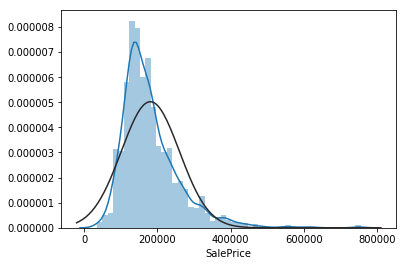

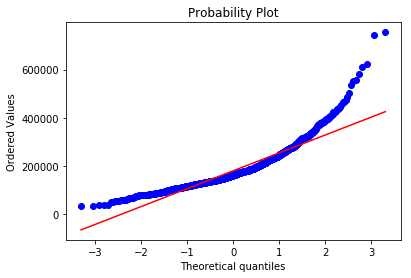

In [128]:
# distribution histgram and normal probability plot of 'SalePrice' before transformation
sns.distplot(y, fit=norm)
plt.figure()
stats.probplot(y, plot=plt)

In [202]:
# transform 'SalePrice' to log'SalePrice'
y = np.log1p(y)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 10.46027076,  10.47197813,  10.54273278, ...,  13.34550853,
          13.52114084,  13.53447435])),
 (0.39825964665415098, 12.024057394918403, 0.9953761551826702))

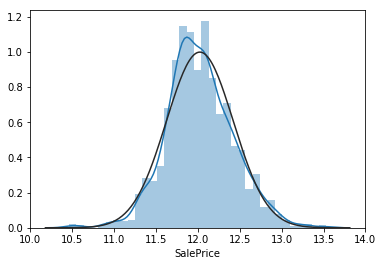

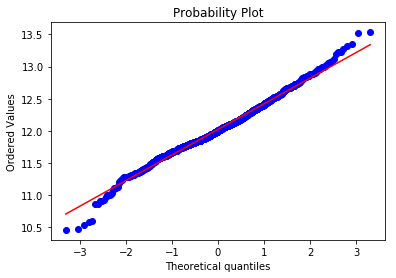

In [129]:
# distribution histgram and normal probability plot of 'SalePrice' after transformation
sns.distplot(y, fit=norm)
plt.figure()
stats.probplot(y, plot=plt)

In [203]:
# check the skewness of all numerical variables in train_test set

var_list = list(train_test)
num_vars = []
temp = train_test.copy()
for var in var_list:
    if temp[var].dtype != object:
        num_vars.append(var)
        temp[var].dropna(inplace=True)
        if temp[var].skew() > 0.75:
            train_test[var] = np.log1p(train_test[var])

In [204]:
# fill NA's with the mean of the column:
#train_test.fillna(-99, inplace=True)
train_test.fillna(train_test.mean(), inplace=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,NaN,NaN,0.000000,2,2008,WD,Normal
2,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.000000,0.0,NaN,NaN,NaN,0.000000,5,2007,WD,Normal
3,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,NaN,NaN,0.000000,9,2008,WD,Normal
4,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.000000,0.0,NaN,NaN,NaN,0.000000,2,2006,WD,Abnorml
5,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.000000,0.0,NaN,NaN,NaN,0.000000,12,2008,WD,Normal
6,3.931826,RL,4.454347,9.555064,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,MnPrv,Shed,6.552508,10,2009,WD,Normal
7,3.044522,RL,4.330733,9.218804,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,NaN,NaN,0.000000,8,2007,WD,Normal
8,4.110874,RL,4.196175,9.247925,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.000000,0.0,NaN,NaN,Shed,5.860786,11,2009,WD,Normal
9,3.931826,RM,3.951244,8.719481,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,NaN,NaN,0.000000,4,2008,WD,Abnorml


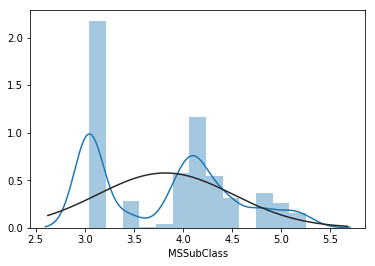

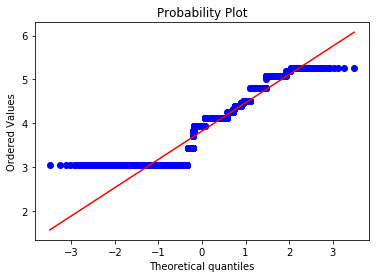

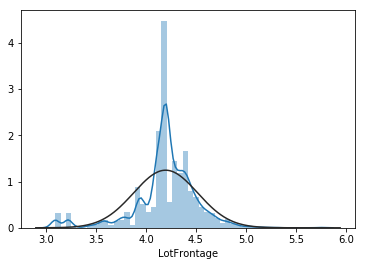

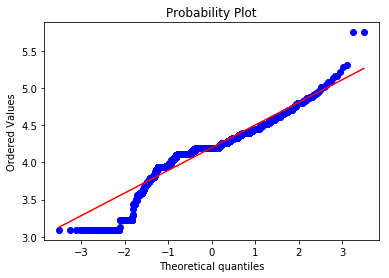

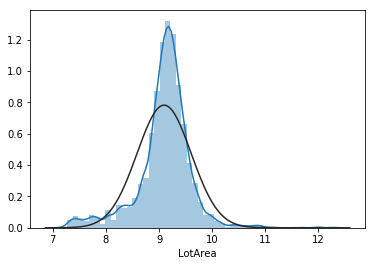

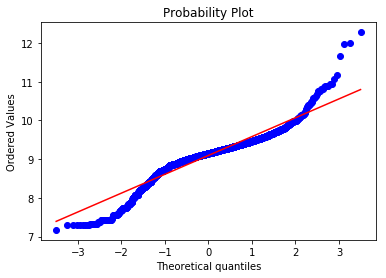

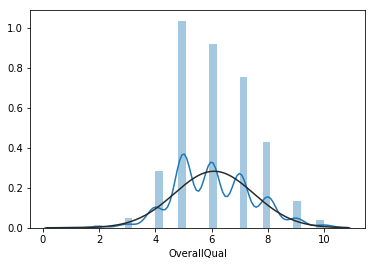

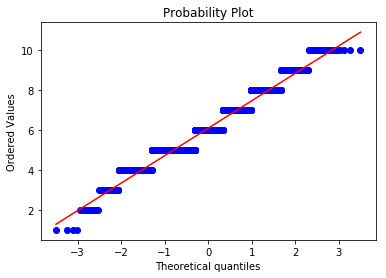

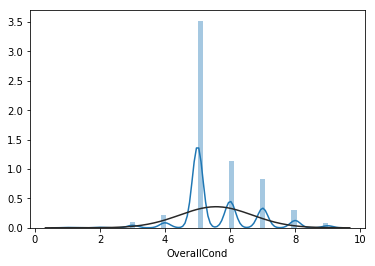

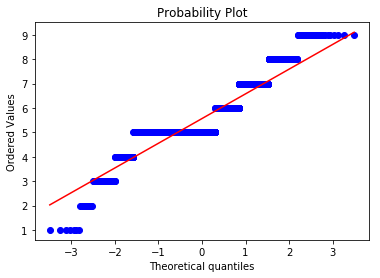

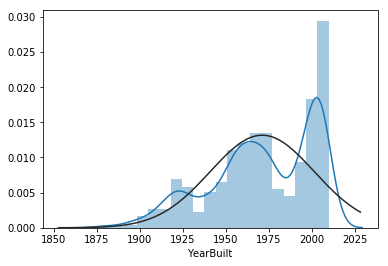

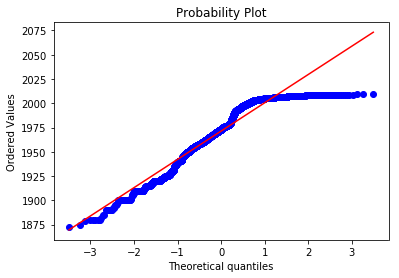

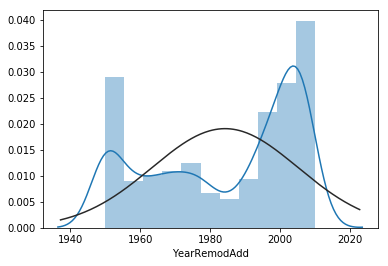

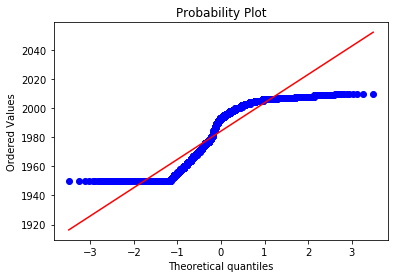

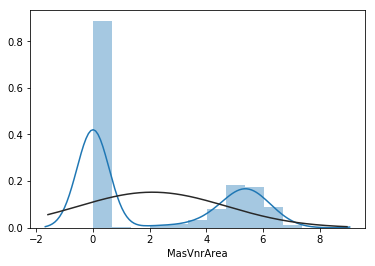

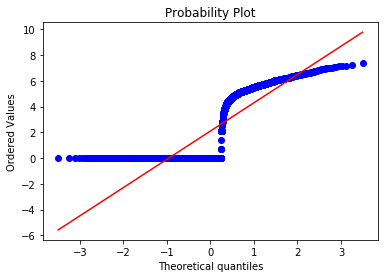

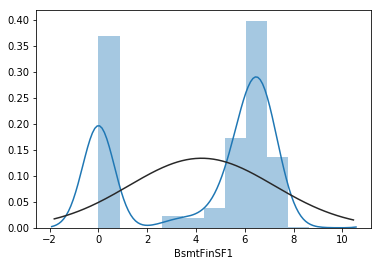

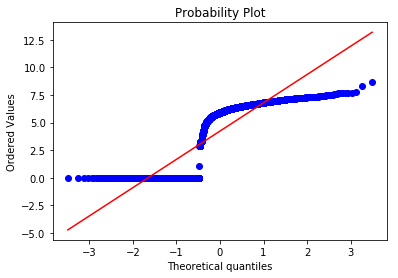

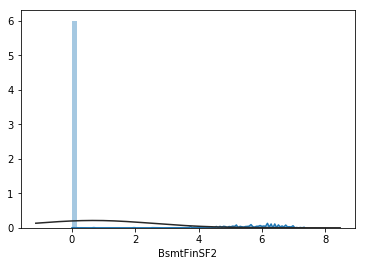

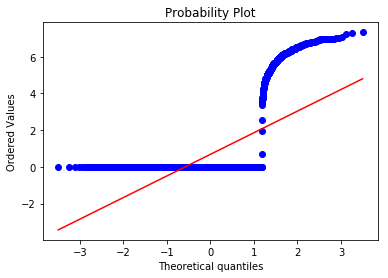

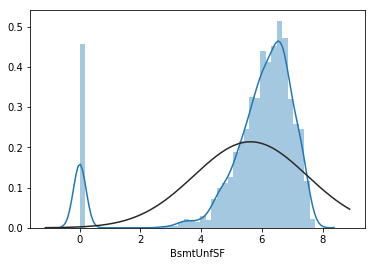

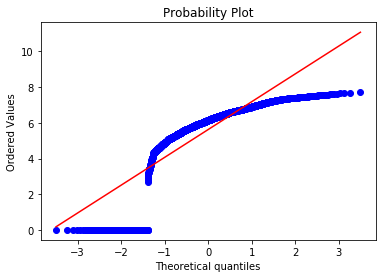

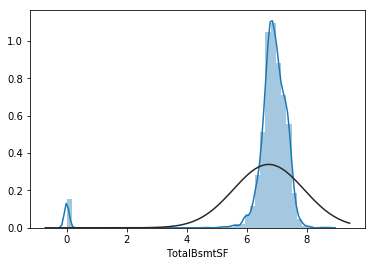

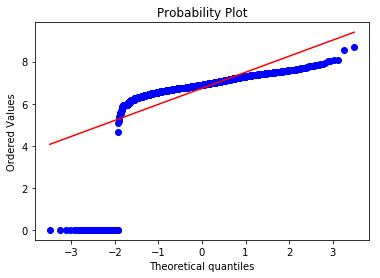

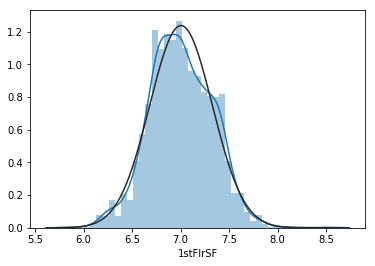

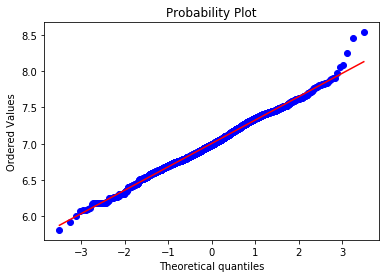

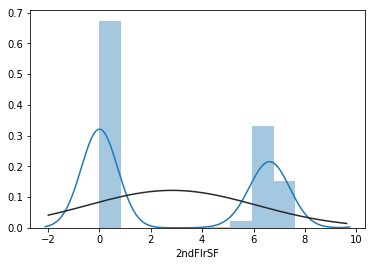

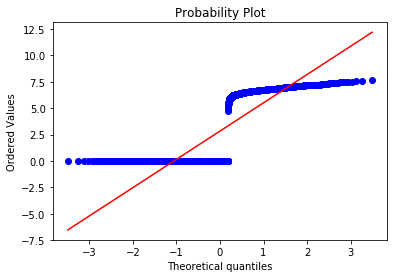

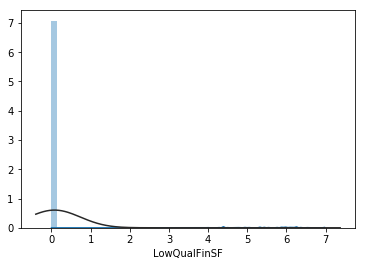

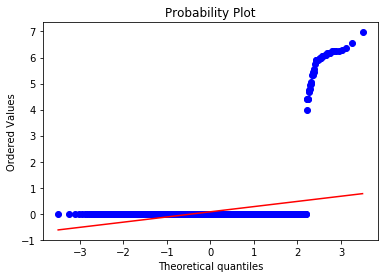

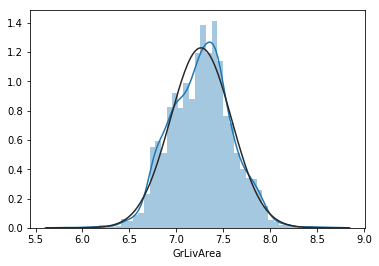

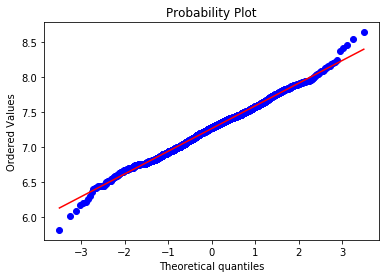

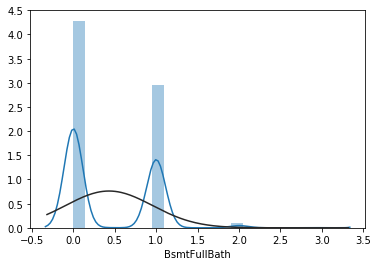

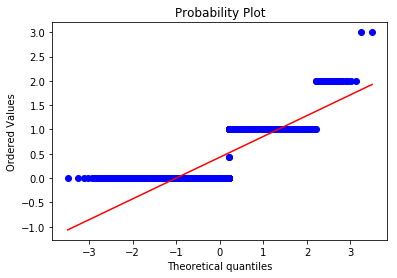

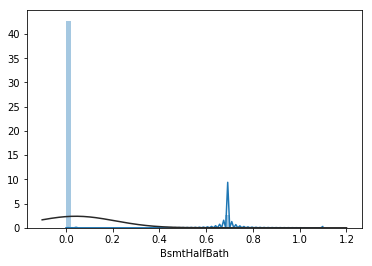

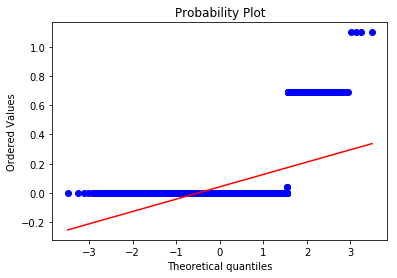

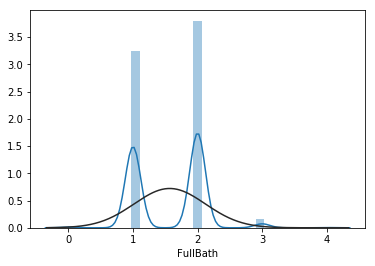

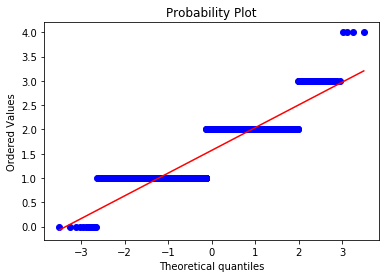

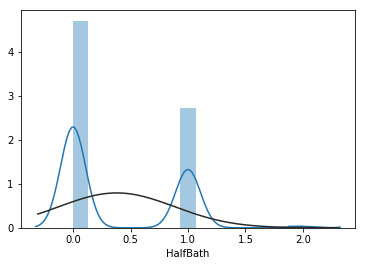

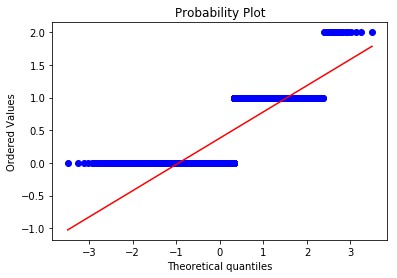

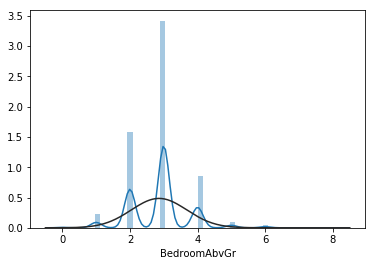

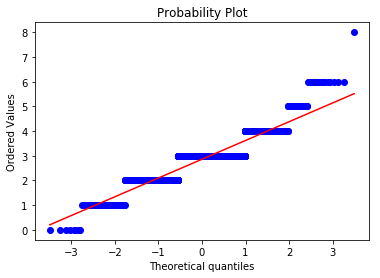

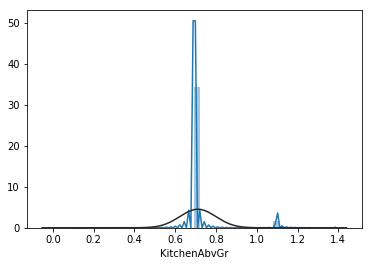

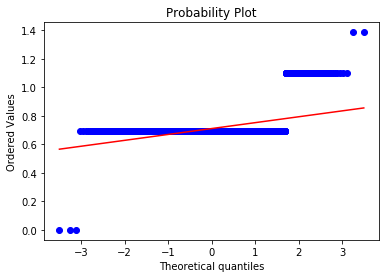

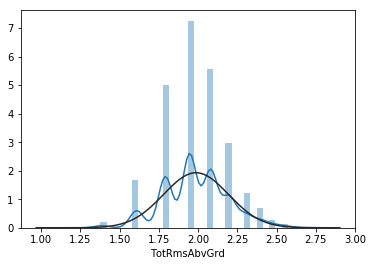

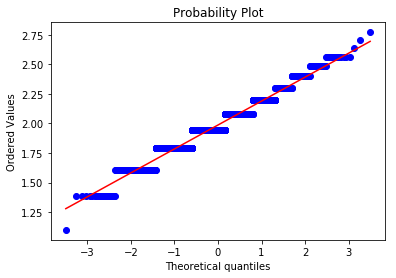

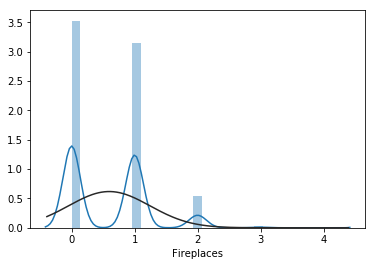

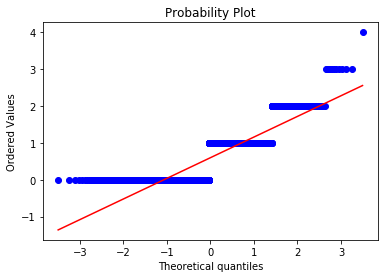

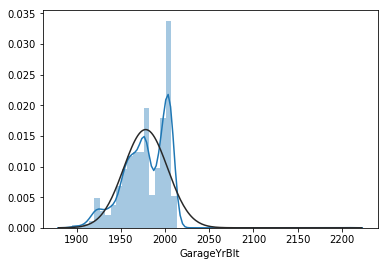

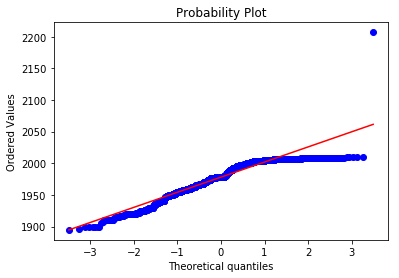

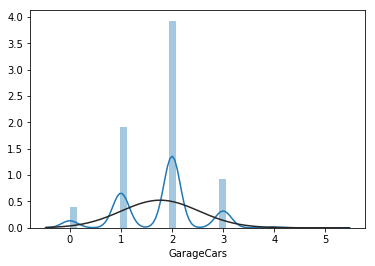

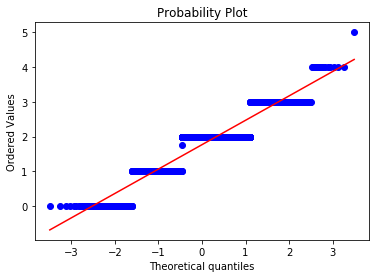

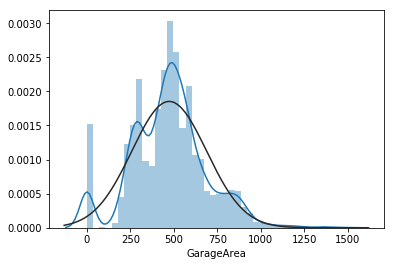

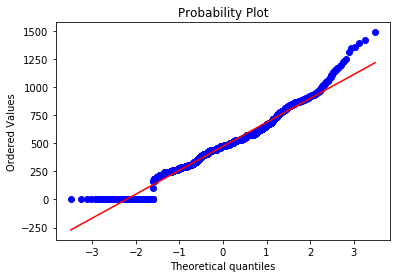

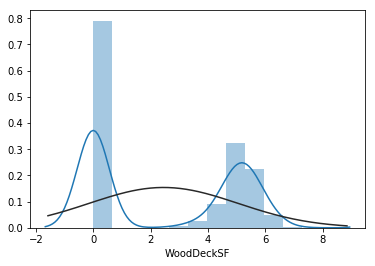

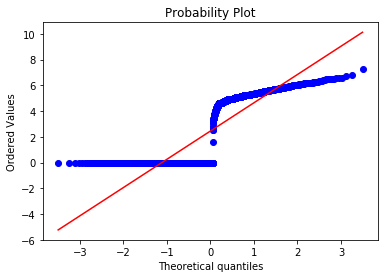

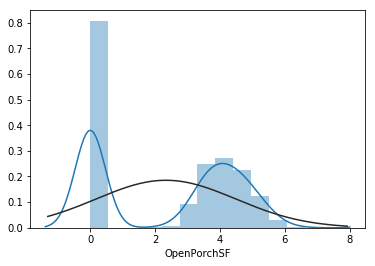

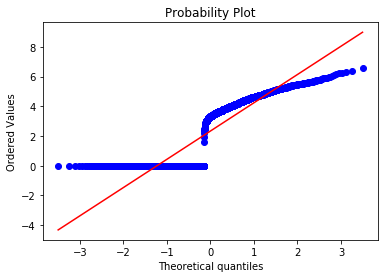

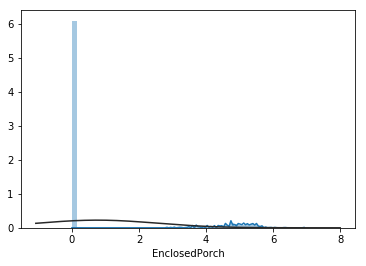

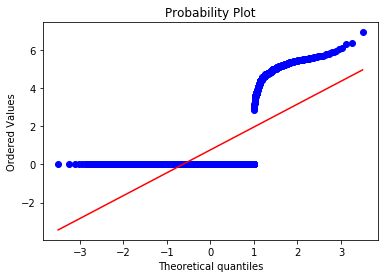

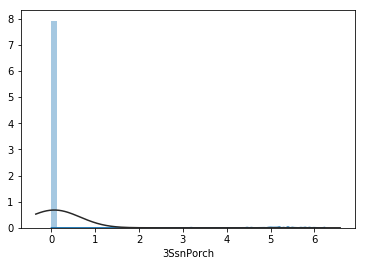

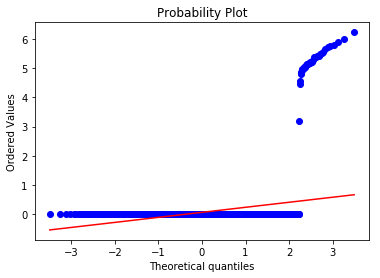

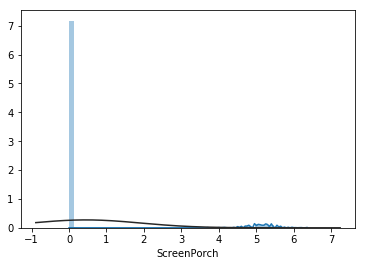

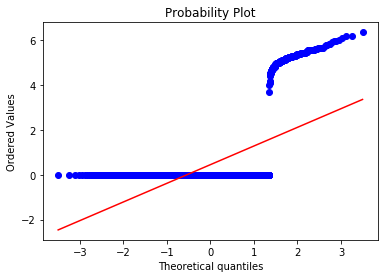

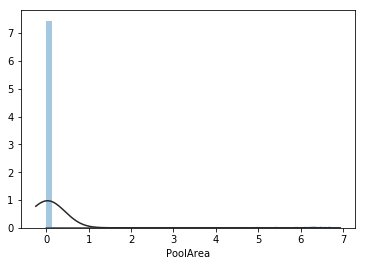

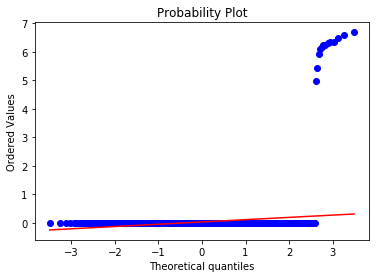

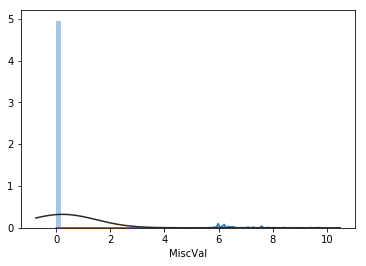

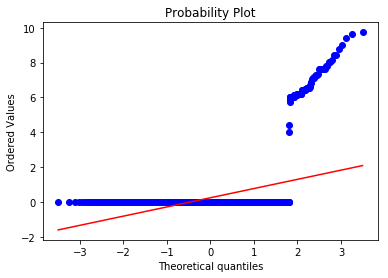

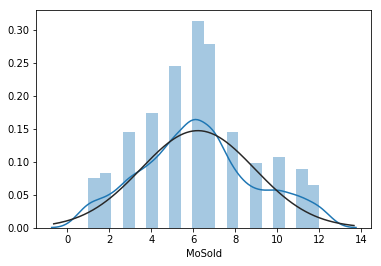

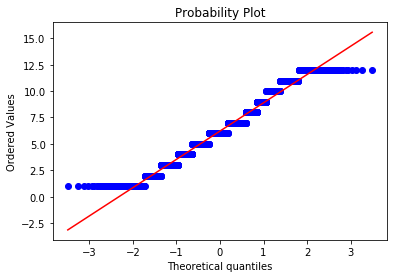

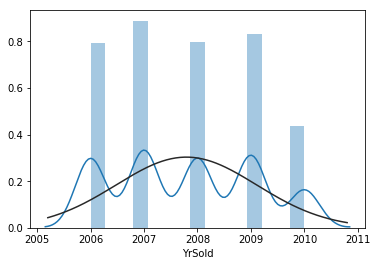

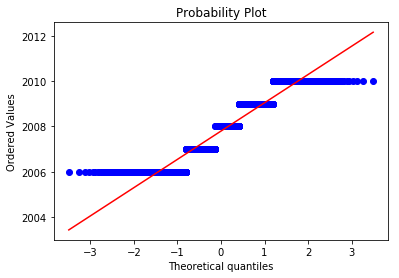

In [45]:
# distribution histgram and normal probability plot of 'SalePrice'

for var in num_vars:
    plt.figure()
    sns.distplot(train_test[var], fit=norm)
    plt.figure()
    stats.probplot(train_test[var], plot=plt)

In [205]:
train_test = pd.get_dummies(train_test)

In [206]:
X_train = train_test[:train.shape[0]]
X_test = train_test[train.shape[0]:]

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
from sklearn.model_selection import train_test_split

X_train_sub, X_valid_sub, y_train_sub, y_valid_sub = train_test_split(X_train, y, test_size=0.25, random_state=0)

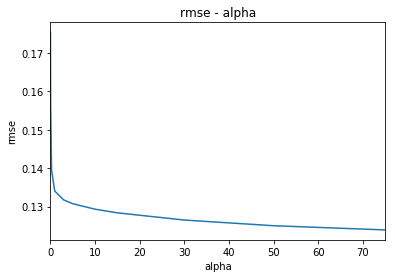

In [209]:
#build model with Ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#optimize parameters
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train_sub, y_train_sub, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "rmse - alpha")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [196]:
cv_ridge

0.05     0.182569
0.10     0.161858
0.30     0.141577
1.00     0.134533
3.00     0.131945
5.00     0.130938
10.00    0.129506
15.00    0.128569
30.00    0.126758
50.00    0.125346
75.00    0.124321
dtype: float64

In [210]:
#train ridge learner
ridge = Ridge(alpha=75)
ridge.fit(X_train_sub, y_train_sub)
y_pred = ridge.predict(X_valid_sub)

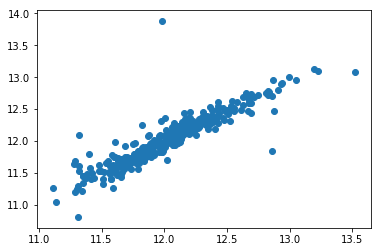

In [211]:
plt.figure()
plt.scatter(x=y_valid_sub, y=y_pred)

In [212]:
preds = pd.DataFrame({"prediction":y_pred, "true":y_valid_sub})
preds.corr()

,prediction,true
prediction,1.000000,0.908794
true,0.908794,1.000000


(-1.5, 0.5)

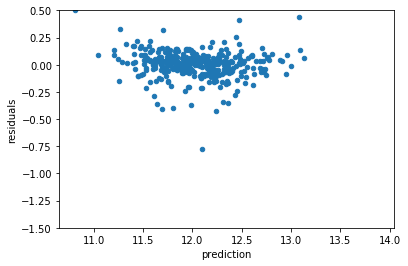

In [213]:
# plot the residuals:
plt.figure(figsize=(6.0, 6.0))
preds["residuals"] = preds["true"] - preds["prediction"]
preds.plot(x="prediction", y="residuals",kind = "scatter")
plt.ylim(ymin=-1.5, ymax=0.5)

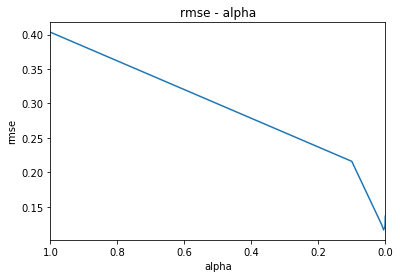

In [214]:
#build model with Lasso

from sklearn.linear_model import Lasso

#optimize parameters
alphas = [1, 0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "rmse - alpha")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [215]:
cv_lasso

1.00000    0.403394
0.10000    0.216074
0.01000    0.123432
0.00500    0.116553
0.00100    0.121183
0.00050    0.124872
0.00010    0.131132
0.00001    0.136443
dtype: float64

In [216]:
#train on the training set
lasso = Lasso(alpha=0.005)
lasso.fit(X_train_sub, y_train_sub)
y_pred = lasso.predict(X_valid_sub)

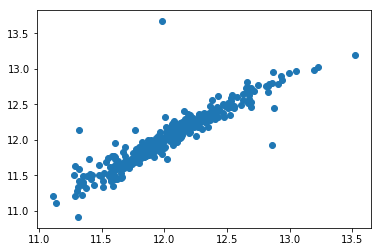

In [217]:
#validation vs prediction plot
plt.figure()
plt.scatter(x=y_valid_sub, y=y_pred)

In [218]:
preds = pd.DataFrame({"prediction":y_pred, "true":y_valid_sub})
preds.corr()

,prediction,true
prediction,1.000000,0.924386
true,0.924386,1.000000


(-1.5, 0.5)

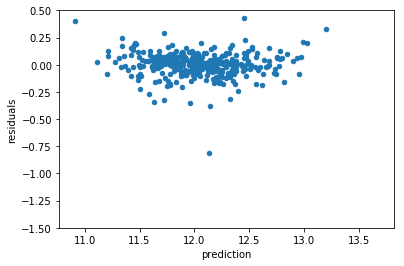

In [219]:
#the residuals vs prediction plot
plt.figure(figsize=(6.0, 6.0))
preds["residuals"] = preds["true"] - preds["prediction"]
preds.plot(x="prediction", y="residuals",kind = "scatter")
plt.ylim(ymin=-1.5, ymax=0.5)

In [226]:
log_predictions = lasso.predict(X_test)
predictions = np.expm1(log_predictions)
test['SalePrice'] = predictions
test.reset_index(inplace=True)

In [227]:
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = test['SalePrice']
submission.to_csv('submission.csv', index=None)

In [71]:
#get coefficients
coef = pd.Series(lasso.coef_, index = X_train.columns)

In [72]:
#get variables used in learning
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 97 variables and eliminated the other 127 variables


In [73]:
#get the most important coeffecients
important_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

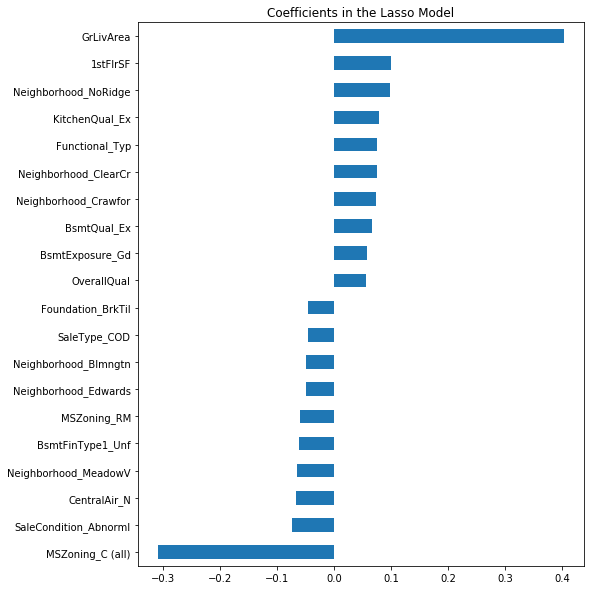

In [74]:
plt.figure(figsize=(8, 10))
important_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [220]:
#build model with boosting algorithm

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=250, max_depth=2, learning_rate=0.1)
xgb.fit(X_train_sub, y_train_sub)

y_pred = xgb.predict(X_valid_sub)

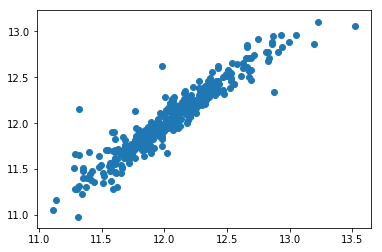

In [221]:
#validation vs prediction plot
plt.figure()
plt.scatter(x=y_valid_sub, y=y_pred)

In [222]:
preds = pd.DataFrame({"prediction":y_pred, "true":y_valid_sub})
preds.corr()

,prediction,true
prediction,1.000000,0.946952
true,0.946952,1.000000


(-1.5, 0.5)

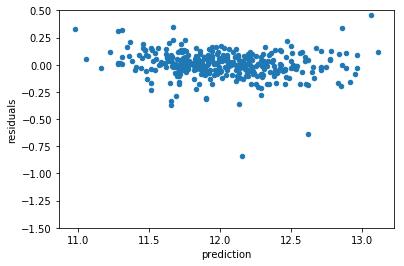

In [223]:
# plot the residuals:

plt.figure(figsize=(6.0, 6.0))
preds["residuals"] = preds["true"] - preds["prediction"]
preds.plot(x="prediction", y="residuals",kind = "scatter")
plt.ylim(ymin=-1.5, ymax=0.5)

In [224]:
#prediction
log_predictions = xgb.predict(X_test)
predictions = np.expm1(log_predictions)
test['SalePrice'] = predictions
test.reset_index(inplace=True)

In [225]:
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = test['SalePrice']
submission.to_csv('submission.csv', index=None)